In [1]:
 #Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests libaray.
import requests

# import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])
    

-64.31779756028615 -28.951461191892406
-73.75440024246774 -14.939908320319773
32.24582285738609 -68.49119711129639
-44.28009374411891 149.3448749101176
-52.911150873322285 136.24633386182774
8.658530180386705 163.97262350970288
70.16746794808938 -145.86742060174527
-21.17956897832289 -63.086694204819125
24.08734542670193 -87.50701374720335
-50.471753764468914 -76.51871762336062
21.214972072920204 -128.33708291594758
-6.561406328531902 61.80933761392163
-69.67023770288255 70.01842353029471
58.61071165516813 -115.05967993803178
-68.83346266706326 -114.0726481996714
-56.34651581626595 44.247383024567455
60.908825482142674 -64.46467464365104
32.302600101922394 -29.921349034164507
-48.01770946430685 -4.262971855247542
-67.44442307823817 -87.89652920989319
84.12252179463553 101.82399894372475
-6.0038020788550455 130.6747489343599
-66.23991236022152 2.5538499814385034
-83.53682697170014 120.83835520956632
-84.91655300930066 72.4098577453183
10.504794237610028 -128.11204325827285
-53.055860862

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

mar del plata ar
cape town za
hamilton bm
hobart au
new norfolk au
butaritari ki
fairbanks us
villamontes bo
panaba mx
punta arenas cl
san quintin mx
victoria sc
taolanaro mg
high level ca
punta arenas cl
east london za
iqaluit ca
ribeira grande pt
cape town za
punta arenas cl
khatanga ru
tual id
hermanus za
new norfolk au
taolanaro mg
constitucion mx
rikitea pf
nanakuli us
hithadhoo mv
lapua fi
hobart au
walvis bay na
bluff nz
namibe ao
port alfred za
ushuaia ar
kahului us
ribeira grande pt
burgos es
aasiaat gl
nikolskoye ru
chuy uy
vaini to
porirua nz
avarua ck
iqaluit ca
poum nc
komsomolskiy ru
bethel us
barrow us
salalah om
thinadhoo mv
ushuaia ar
sitka us
busselton au
jiroft ir
ushuaia ar
fairbanks us
ushuaia ar
ushuaia ar
saint anthony ca
jamestown sh
mys shmidta ru
yellowknife ca
mahebourg mu
hermanus za
nelson bay au
thompson ca
caribou us
sentyabrskiy ru
lata sb
gorontalo id
hobart au
bluff nz
ushuaia ar
punta arenas cl
rawannawi ki
nikolskoye ru
tasiilaq gl
safaga eg
hamilton

marzuq ly
upernavik gl
panguna pg
santarem br
barcelos br
constitucion mx
cherskiy ru
phuket th
umzimvubu za
panjab af
ushuaia ar
sur om
diffa ne
praia cv
chuy uy
liverpool ca
oksfjord no
zhuhai cn
atuona pf
busselton au
boatlaname bw
melita ca
suntar ru
sola vu
pangnirtung ca
faanui pf
hermanus za
qaanaaq gl
camacupa ao
saskylakh ru
madimba tz
amderma ru
mbanza-ngungu cd
aswan eg
rikitea pf
albany au
bredasdorp za
nemuro jp
dikson ru
bluff nz
gat ly
hualmay pe
bluff nz
chicama pe
rikitea pf
thompson ca
illoqqortoormiut gl
lavrentiya ru
georgetown sh
rikitea pf
hermanus za
manati cu
saldanha za
lorengau pg
saint-pierre pm
vardo no
vaini to
broome au
tlacotepec mx
rikitea pf
albany au
luanda ao
severo-kurilsk ru
jamestown sh
hambantota lk
leh in
ushuaia ar
krasnoarmeysk kz
marcona pe
rabo de peixe pt
cacule br
celestun mx
itarema br
nome us
price ca
doctor pedro p. pena py
gorno-chuyskiy ru
cururupu br
sao filipe cv
maragogi br
alkhan-churt ru
alwar in
oranjemund na
baiyin cn
georgetown

nemuro jp
hay river ca
thompson ca
albany au
san andres co
camana pe
rikitea pf
punta arenas cl
hobart au
tiznit ma
barrow us
arraial do cabo br
upernavik gl
guerrero negro mx
aklavik ca
lerwick gb
tuktoyaktuk ca
cidreira br
airai pw
tiksi ru
ugoofaaru mv
punta arenas cl
souillac mu
umzimvubu za
ushuaia ar
meulaboh id
avarua ck
mataura pf
khatanga ru
jiddah sa
linhai cn
sao felix do xingu br
punta arenas cl
torbay ca
lodja cd
henties bay na
belushya guba ru
ngunguru nz
pontes e lacerda br
hermanus za
bonfim br
mataura pf
pevek ru
vitoria da conquista br
ivanteyevka ru
marsa matruh eg
pisco pe
verkhnevilyuysk ru
devils lake us
upernavik gl
souillac mu
xining cn
yuzhno-kurilsk ru
arraial do cabo br
mar del plata ar
alofi nu
grand river south east mu
tuktoyaktuk ca
ribeira grande pt
illoqqortoormiut gl
taolanaro mg
cape town za
manokwari id
vaini to
hithadhoo mv
sigli id
dzerzhinsk ua
kamyaran ir
yellowknife ca
vaini to
george town ky
hambantota lk
aklavik ca
tiksi ru
hualmay pe
albany au

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)
        

599

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID&APPID=" + weather_api_key


In [9]:

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Processing Record 1 of Set 1 | mar del plata
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | hamilton
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | fairbanks
Processing Record 8 of Set 1 | villamontes
Processing Record 9 of Set 1 | panaba
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | san quintin
Processing Record 12 of Set 1 | victoria
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | high level
Processing Record 15 of Set 1 | east london
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | khatanga
Processing Record 19 of Set 1 | tual
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | constitucion
Processing Record 22 of Set 1 | rikitea
Processing Record 23 of Set 1 | nanakuli
Processing

Processing Record 38 of Set 4 | malwan
City not found. Skipping...
Processing Record 39 of Set 4 | katsuura
Processing Record 40 of Set 4 | tiksi
Processing Record 41 of Set 4 | sambava
Processing Record 42 of Set 4 | uk
City not found. Skipping...
Processing Record 43 of Set 4 | bredasdorp
Processing Record 44 of Set 4 | berlevag
Processing Record 45 of Set 4 | saint-philippe
Processing Record 46 of Set 4 | waingapu
Processing Record 47 of Set 4 | richards bay
Processing Record 48 of Set 4 | provideniya
Processing Record 49 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 50 of Set 4 | cherskiy
Processing Record 1 of Set 5 | shamkhal
Processing Record 2 of Set 5 | birao
Processing Record 3 of Set 5 | arman
Processing Record 4 of Set 5 | nizhnevartovsk
Processing Record 5 of Set 5 | makakilo city
Processing Record 6 of Set 5 | severo-yeniseyskiy
Processing Record 7 of Set 5 | alice springs
Processing Record 8 of Set 5 | bireun
Processing Record 9 of Set 5 | bindura

Processing Record 30 of Set 8 | price
Processing Record 31 of Set 8 | doctor pedro p. pena
City not found. Skipping...
Processing Record 32 of Set 8 | gorno-chuyskiy
City not found. Skipping...
Processing Record 33 of Set 8 | cururupu
Processing Record 34 of Set 8 | sao filipe
Processing Record 35 of Set 8 | maragogi
Processing Record 36 of Set 8 | alkhan-churt
Processing Record 37 of Set 8 | alwar
Processing Record 38 of Set 8 | oranjemund
Processing Record 39 of Set 8 | baiyin
Processing Record 40 of Set 8 | altamont
Processing Record 41 of Set 8 | alofi
Processing Record 42 of Set 8 | jieshi
Processing Record 43 of Set 8 | tsiroanomandidy
Processing Record 44 of Set 8 | kumluca
Processing Record 45 of Set 8 | beringovskiy
Processing Record 46 of Set 8 | saravan
Processing Record 47 of Set 8 | khandbari
Processing Record 48 of Set 8 | coahuayana
Processing Record 49 of Set 8 | okhotsk
Processing Record 50 of Set 8 | karamea
City not found. Skipping...
Processing Record 1 of Set 9 | r

Processing Record 18 of Set 12 | tiznit
Processing Record 19 of Set 12 | ugoofaaru
Processing Record 20 of Set 12 | linhai
Processing Record 21 of Set 12 | lodja
Processing Record 22 of Set 12 | henties bay
Processing Record 23 of Set 12 | ngunguru
Processing Record 24 of Set 12 | pontes e lacerda
Processing Record 25 of Set 12 | bonfim
Processing Record 26 of Set 12 | vitoria da conquista
Processing Record 27 of Set 12 | ivanteyevka
Processing Record 28 of Set 12 | marsa matruh
Processing Record 29 of Set 12 | verkhnevilyuysk
Processing Record 30 of Set 12 | yuzhno-kurilsk
Processing Record 31 of Set 12 | sigli
Processing Record 32 of Set 12 | dzerzhinsk
Processing Record 33 of Set 12 | kamyaran
Processing Record 34 of Set 12 | george town
Processing Record 35 of Set 12 | ambodifototra
City not found. Skipping...
Processing Record 36 of Set 12 | molfetta
Processing Record 37 of Set 12 | barabai
Processing Record 38 of Set 12 | razole
Processing Record 39 of Set 12 | puerto carreno
Pro

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mar Del Plata,-38.0023,-57.5575,58.08,93,100,13.00,AR,2022-09-17 23:47:11
1,Cape Town,-33.9258,18.4232,55.11,68,40,5.75,ZA,2022-09-17 23:50:03
2,Hamilton,39.1834,-84.5333,78.84,64,2,3.13,US,2022-09-17 23:53:46
3,Hobart,-42.8794,147.3294,57.25,67,40,9.22,AU,2022-09-17 23:47:06
4,New Norfolk,-42.7826,147.0587,56.91,75,81,1.99,AU,2022-09-17 23:49:32
5,Butaritari,3.0707,172.7902,82.74,66,65,11.12,KI,2022-09-17 23:51:28
6,Fairbanks,64.8378,-147.7164,57.22,50,75,14.97,US,2022-09-17 23:52:29
7,Villamontes,-21.2500,-63.5000,82.62,41,1,7.23,BO,2022-09-17 23:53:47
8,Panaba,21.2833,-88.2667,83.43,69,52,14.38,MX,2022-09-17 23:53:48
9,Punta Arenas,-53.1500,-70.9167,41.11,65,0,18.41,CL,2022-09-17 23:47:25


In [12]:
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order] 
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mar Del Plata,AR,2022-09-17 23:47:11,-38.0023,-57.5575,58.08,93,100,13.00
1,Cape Town,ZA,2022-09-17 23:50:03,-33.9258,18.4232,55.11,68,40,5.75
2,Hamilton,US,2022-09-17 23:53:46,39.1834,-84.5333,78.84,64,2,3.13
3,Hobart,AU,2022-09-17 23:47:06,-42.8794,147.3294,57.25,67,40,9.22
4,New Norfolk,AU,2022-09-17 23:49:32,-42.7826,147.0587,56.91,75,81,1.99
5,Butaritari,KI,2022-09-17 23:51:28,3.0707,172.7902,82.74,66,65,11.12
6,Fairbanks,US,2022-09-17 23:52:29,64.8378,-147.7164,57.22,50,75,14.97
7,Villamontes,BO,2022-09-17 23:53:47,-21.2500,-63.5000,82.62,41,1,7.23
8,Panaba,MX,2022-09-17 23:53:48,21.2833,-88.2667,83.43,69,52,14.38
9,Punta Arenas,CL,2022-09-17 23:47:25,-53.1500,-70.9167,41.11,65,0,18.41


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

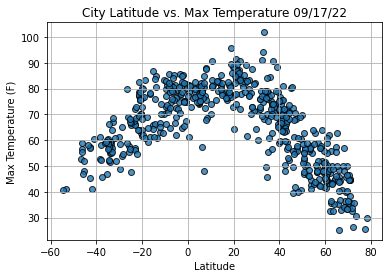

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

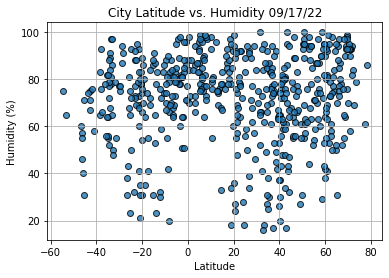

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

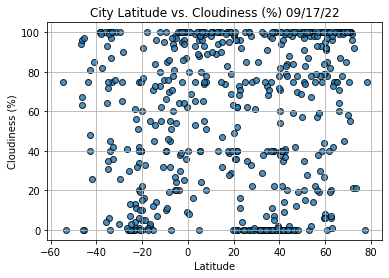

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

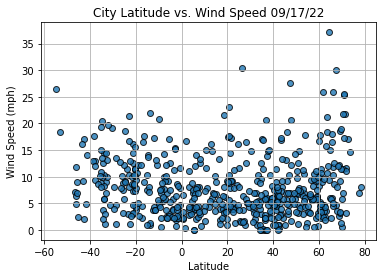

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()